## 청년 AI.Big Data 아카데미 예측분석

In [1]:
import matplotlib

# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rc('axes', unicode_minus=False)

In [2]:
# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')

### 단순선형 회귀분석 연습(24 Page)

In [3]:
# 25 Page
# 데이터 처리
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀분석모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 회귀분석의 정규성 확인
from statsmodels.api import qqplot

In [4]:
# 맑은 고딕 적용
matplotlib.rc("font", family = "Malgun Gothic")
# 음수 표시
matplotlib.rc("axes", unicode_minus = False)

In [6]:
# 26 Page
df_raw = pd.read_csv("./Concrete.csv")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
# 요약통계량
df_raw.describe().round(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


KeyError: 'UNITS'

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

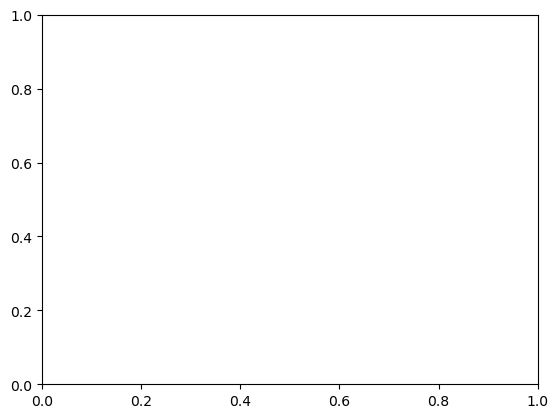

In [8]:
# 27 Page
# 목표변수와 설명변수의 산점도
df_raw.plot.scatter(x = "UNITS", y = "MINUTES")

In [8]:
# 목표변수와 설명변수의 상관계수
df_raw.corr(method = "pearson").round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [9]:
# 28 Page
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           8.92e-13
Time:                        17:38:12   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

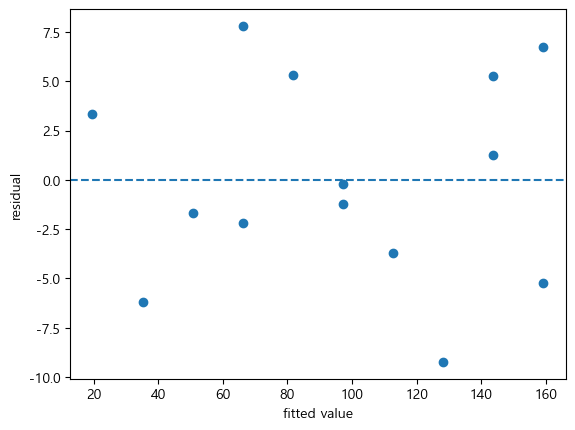

In [10]:
# 29 Page
# 잔차 산점도: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

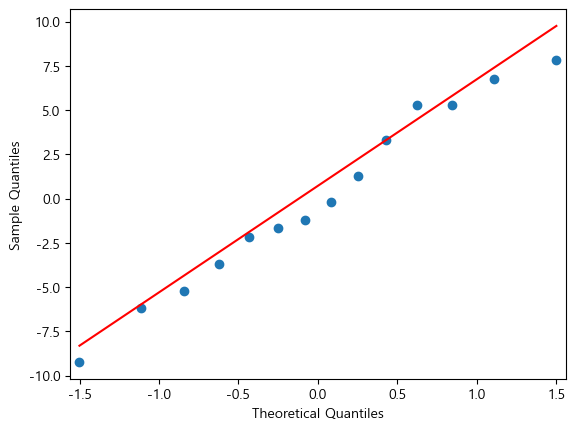

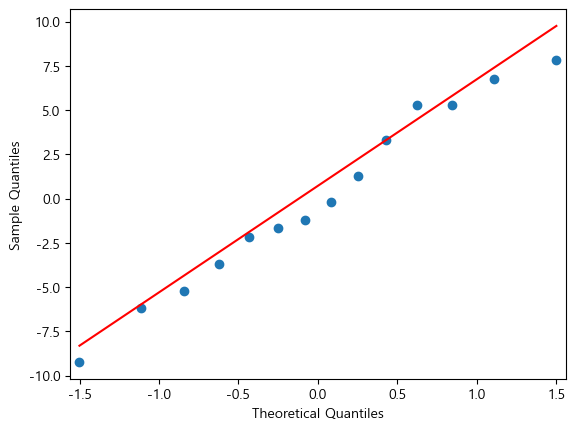

In [11]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

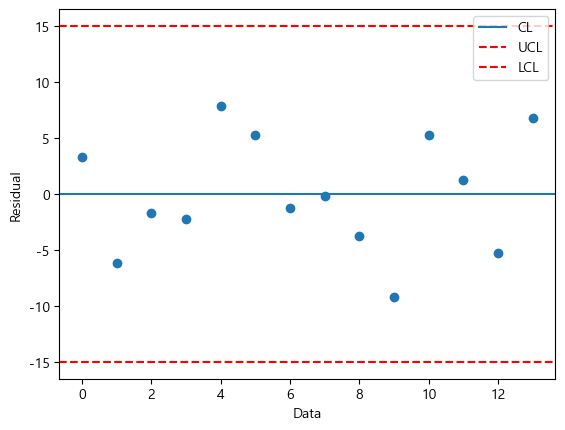

In [12]:
# 30 Page
# 잔차의 독립성 확인
plt.scatter(df_raw.index, reg_result.resid, marker="o")
plt.xlabel("Data") ; plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend() ; plt.show()

### 다중선형회귀분석 (44 Page)

In [9]:
# 45 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 잔차의 정규성 확인 :qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from sklearn.metrics import r2_score

In [19]:
# 46 Page
# 맑은 고딕 적용
matplotlib.rc("font", family = "NaNumGothic")
# 음수 표시
matplotlib.rc("axes", unicode_minus = False)

In [10]:
# 26 Page
df_raw = pd.read_csv("./Concrete.csv")
df_raw.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
# 47 Page
# 결측치 확인
df_raw.isnull().sum()

cement                0
blast_furnace_slag    0
fly_ash               0
water                 0
superplasticizer      0
coarse_aggregate      0
fine_aggregate        0
age                   0
strength              0
dtype: int64

In [15]:
df_raw.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'],
      dtype='object')

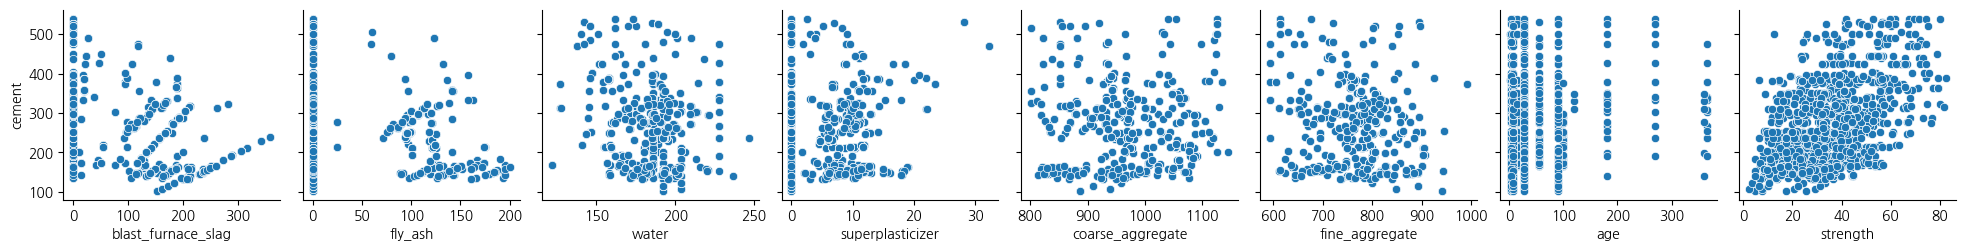

In [20]:
# 48 Page
# 산점도 행렬:목표변수와 설명변수 지정
sns.pairplot(df_raw, y_vars="cement", x_vars=[ 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'])

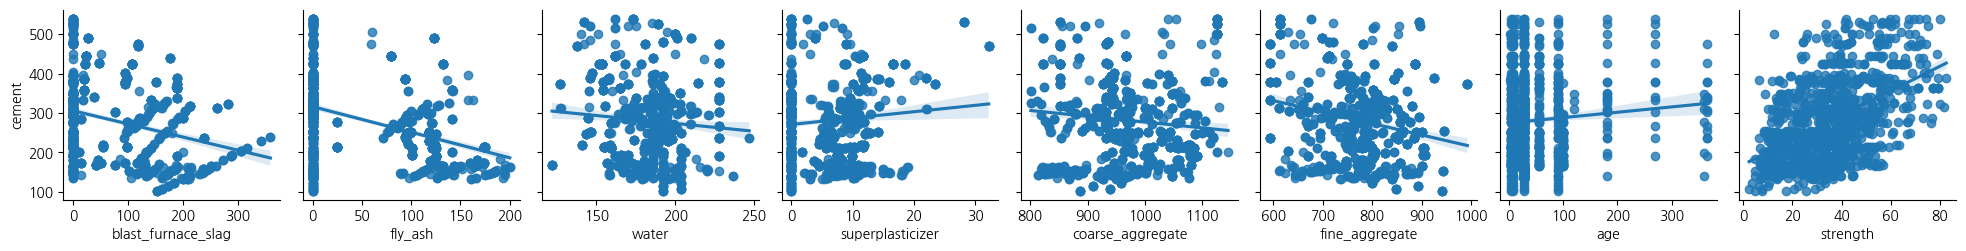

In [21]:
# 회귀 적합선 추가 : kind ="reg" 
sns.pairplot(df_raw, y_vars="cement", x_vars=[ 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate', 'age', 'strength'], kind="reg")

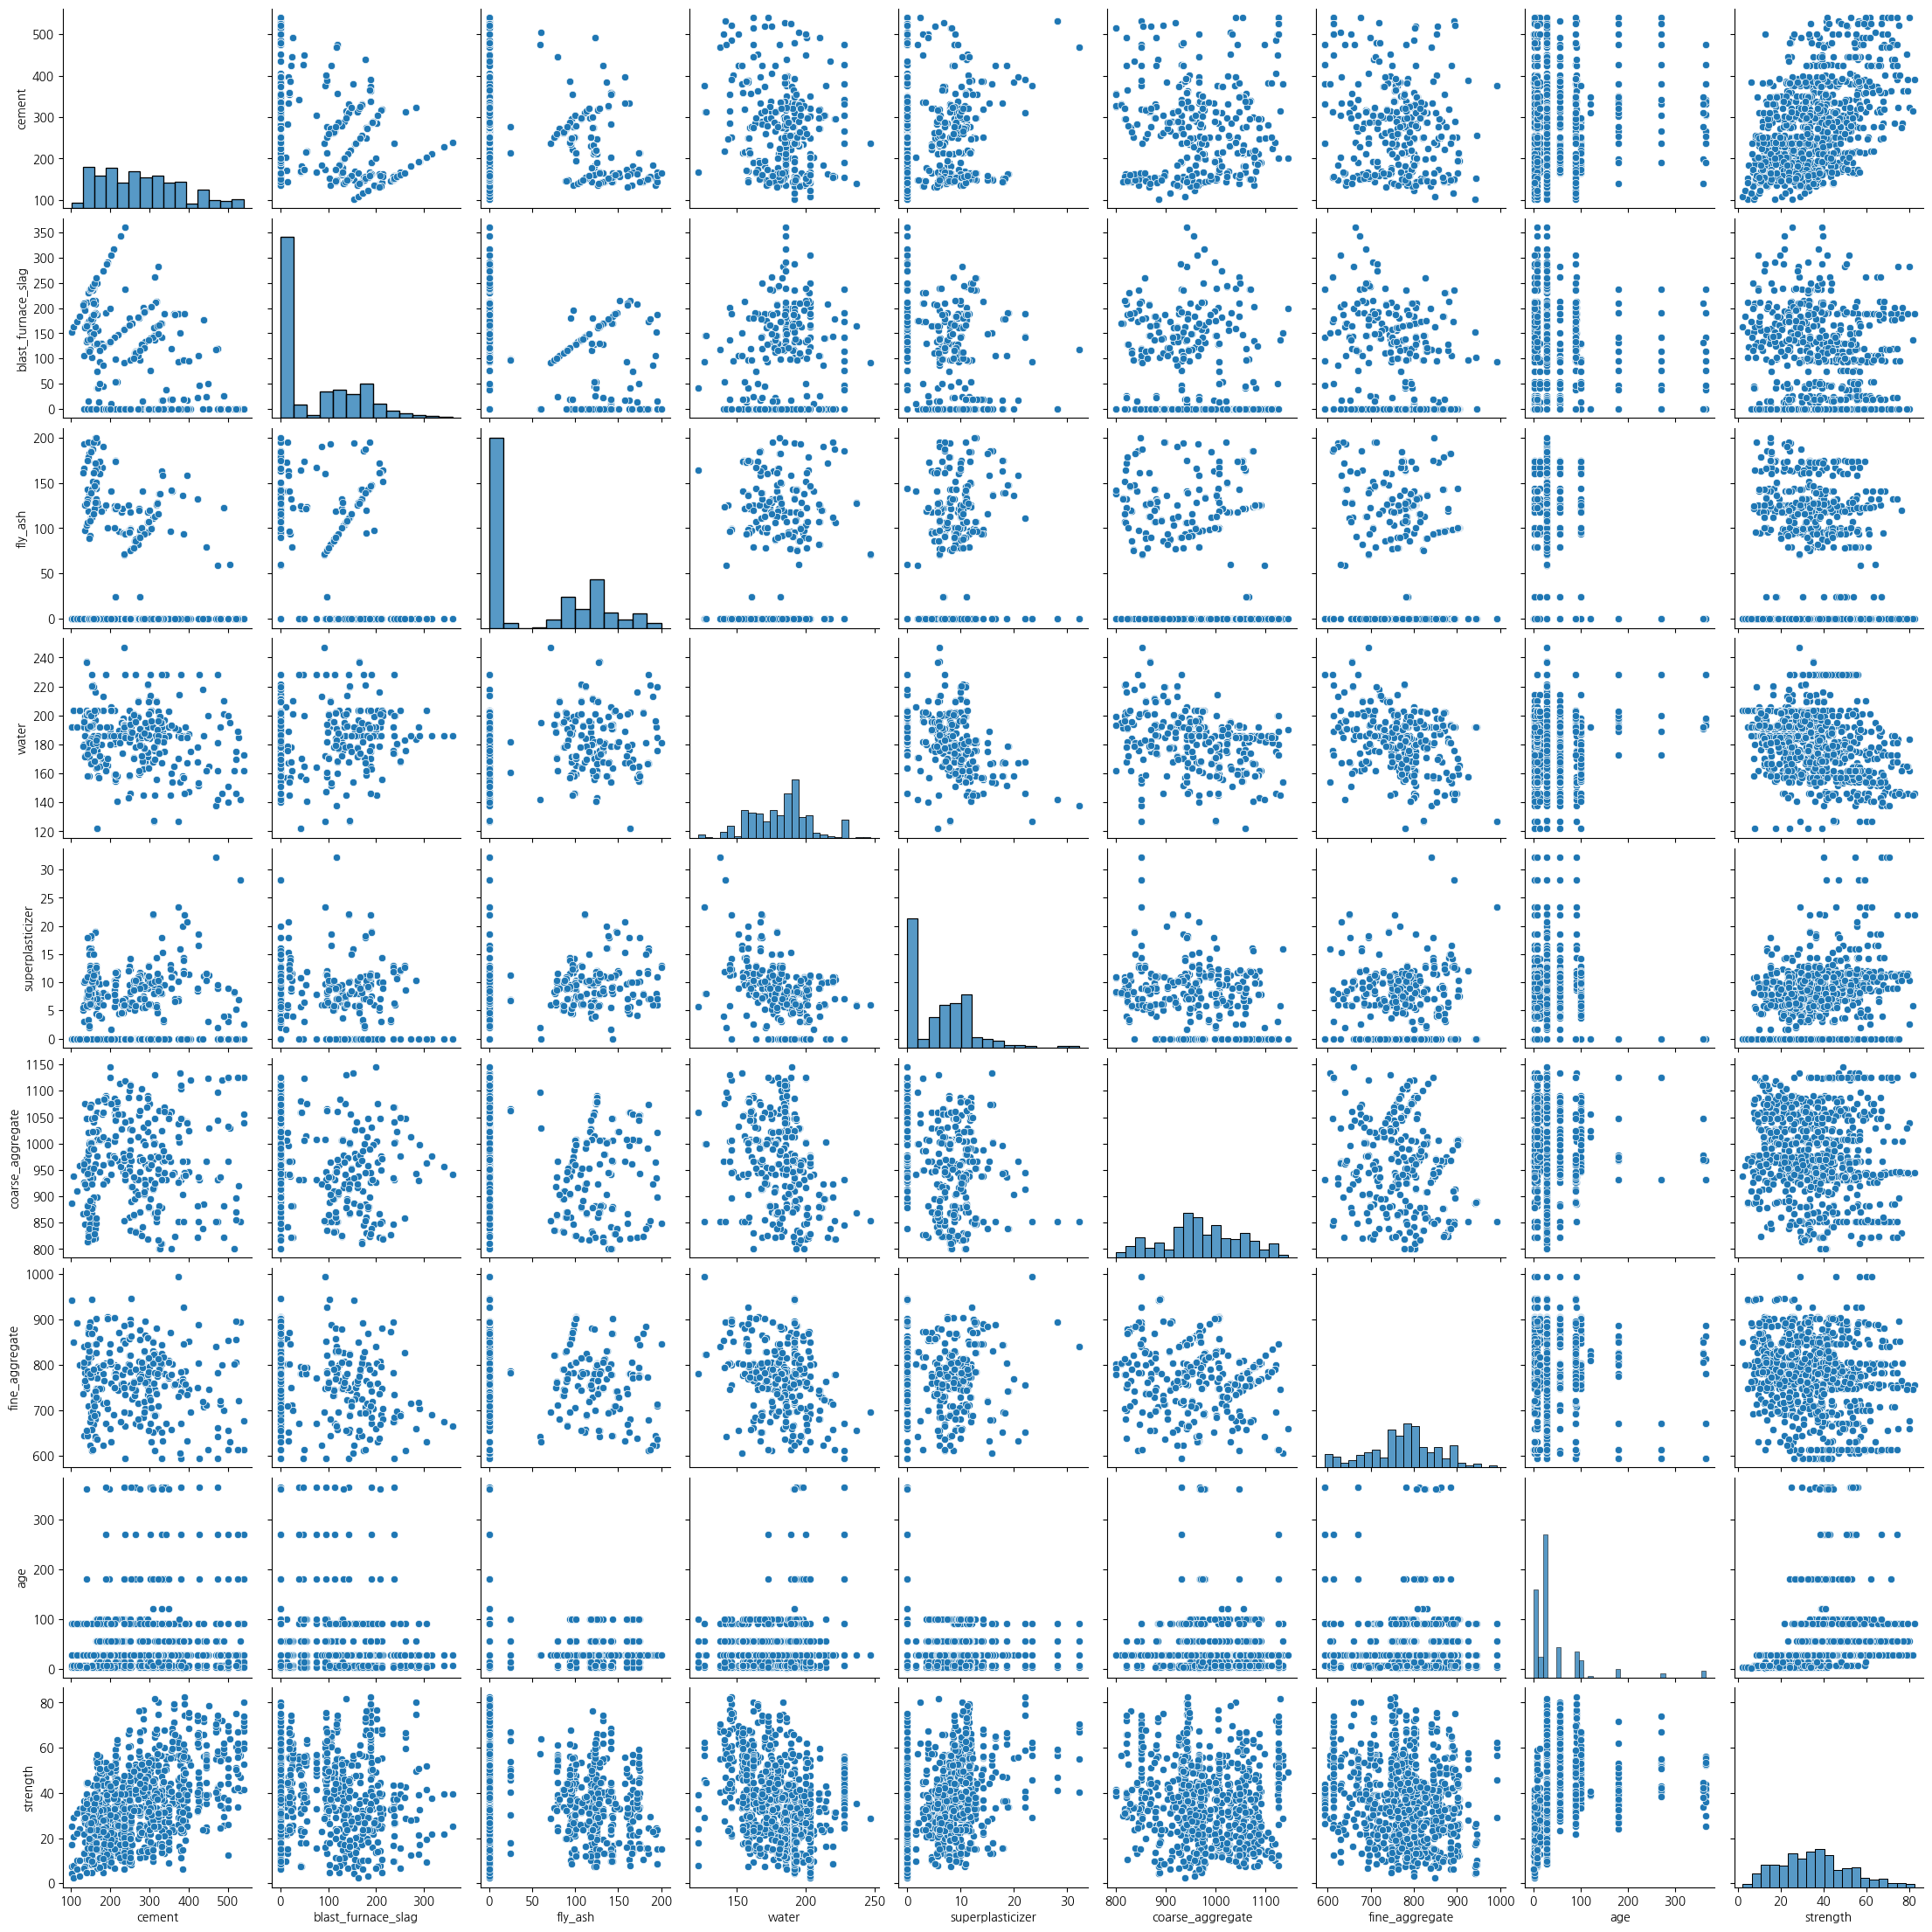

In [22]:
# 49 Page
# 산점도 행렬:전체 숫자형 변수
sns.pairplot(df_raw)

In [25]:
# 50 Page
# 상관관계 분석
df_raw.corr().round(3)

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,strength
cement,1.000,-0.275,-0.397,-0.082,0.092,-0.109,-0.223,0.082,0.498
blast_furnace_slag,-0.275,1.000,-0.324,0.107,0.043,-0.284,-0.282,-0.044,0.135
fly_ash,-0.397,-0.324,1.000,-0.257,0.378,-0.010,0.079,-0.154,-0.106
water,-0.082,0.107,-0.257,1.000,-0.658,-0.182,-0.451,0.278,-0.290
superplasticizer,0.092,0.043,0.378,-0.658,1.000,-0.266,0.223,-0.193,0.366
coarse_aggregate,-0.109,-0.284,-0.010,-0.182,-0.266,1.000,-0.178,-0.003,-0.165
fine_aggregate,-0.223,-0.282,0.079,-0.451,0.223,-0.178,1.000,-0.156,-0.167
age,0.082,-0.044,-0.154,0.278,-0.193,-0.003,-0.156,1.000,0.329
strength,0.498,0.135,-0.106,-0.290,0.366,-0.165,-0.167,0.329,1.000


In [24]:
# 51 Page
# train/test data 분리
df_train, df_test = train_test_split(df_raw, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train.shape))
print("test data size : {}".format(df_test.shape))

train data size : (721, 9)
test data size : (309, 9)


In [26]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept) 자동 추가. 코드 중간에서 줄 바꿈 “\” 추가
reg_model = smf.ols(formula = "cement ~ blast_furnace_slag+fly_ash+water+superplasticizer+coarse_aggregate+fine_aggregate+age+strength", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                 cement   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     781.3
Date:                Mon, 04 Nov 2024   Prob (F-statistic):               0.00
Time:                        09:47:14   Log-Likelihood:                -3546.4
No. Observations:                 721   AIC:                             7111.
Df Residuals:                     712   BIC:                             7152.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2377.1403     61

In [27]:
# 53 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train.drop('cement', axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,variable,VIF
7,age,1.50
1,blast_furnace_slag,1.56
2,fly_ash,1.58
8,strength,2.17
5,coarse_aggregate,2.27
6,fine_aggregate,2.50
4,superplasticizer,3.09
3,water,4.70
0,const,2424.33


In [26]:
# 54 Page
# 선형 회귀 분석 : 모델에서 WEIGHT 제거
reg_model = smf.ols(formula = "FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
            KNEE + ANKLE + BICEPS + FOREARM + WRIST + GENDER_여성", data = df_train)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     40.16
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           6.67e-44
Time:                        17:41:01   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1023.
Df Residuals:                     162   BIC:                             1067.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1903      8.664      0.253      0.8

In [27]:
# 55 Page
# 다중공선성 재확인
df_train_x = df_train.drop(["FAT","WEIGHT"], axis = 1)

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,Variable,VIF
13,GENDER_여성,1.04
2,HEIGHT,1.36
11,FOREARM,2.03
9,ANKLE,2.11
1,AGE,2.34
10,BICEPS,3.37
12,WRIST,3.42
3,NECK,3.81
8,KNEE,4.65
4,CHEST,8.81


In [28]:
# 56 Page
# 선형 회귀 분석(유의하지 않은 변수 중 p-value가 가장 큰 것을 하나씩 반복적으로 제거)
reg_model = smf.ols(formula = "FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM", data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           2.18e-49
Time:                        17:41:15   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

In [29]:
# 57 Page
# 설명변수간의 다중공선성 확인 : 설명변수 데이터 생성 및 상수항 추가
df_train_x = df_train[["HEIGHT","NECK", "ABDOMEN", "HIP", "FOREARM"]]
# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) for i in range(df_train_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values('VIF', inplace = True)
df_vif.round(2)

,variable,VIF
1,HEIGHT,1.14
5,FOREARM,1.57
2,NECK,2.87
3,ABDOMEN,4.91
4,HIP,4.95
0,const,516.31


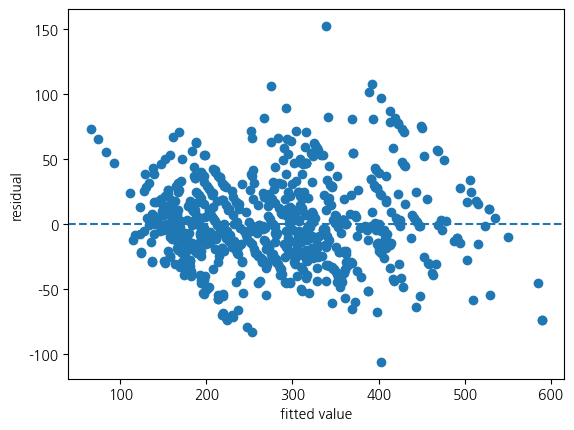

In [28]:
# 58 Page
# 잔차 산점도: X-예측값, Y-잔차 
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value")
plt.ylabel("residual")
plt.axhline(y = 0, linestyle = "--")

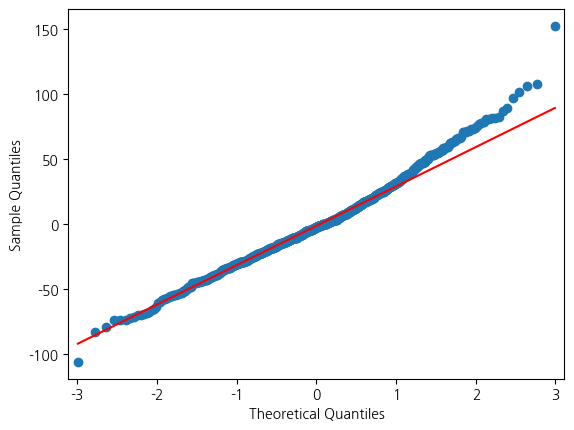

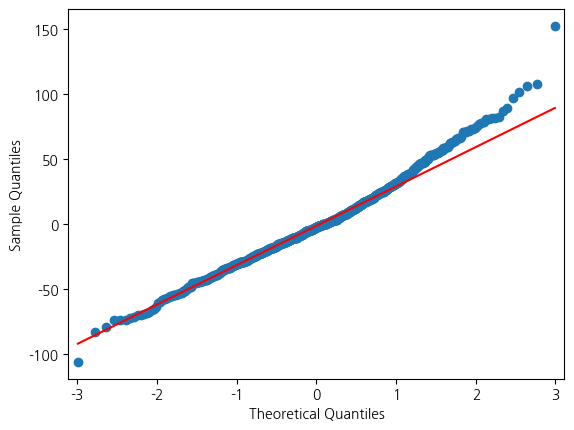

In [29]:
# 잔차 정규성 검정:Q-Q plot. s-standardized line, 
#  r-regression line, q-quartiles
qqplot(reg_result.resid, line = "q")

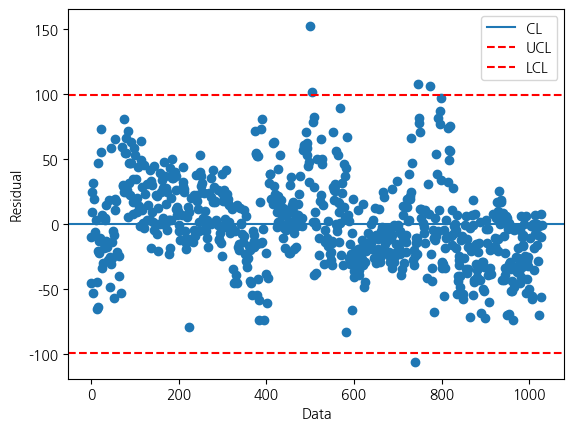

In [30]:
# 59 Page
# 잔차의 독립성 확인
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel("Data")  ;  plt.ylabel("Residual")
plt.axhline(y=0,linestyle="-", label='CL')
plt.axhline(y=3*np.std(reg_result.resid),linestyle="--",color="red",label='UCL' )
plt.axhline(y=-3*np.std(reg_result.resid),linestyle="dashed",color="red",label='LCL')
plt.legend()

In [32]:
# 60 Page
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train['cement'], train_pred))
print("test data의 결정계수:", r2_score(df_test['cement'], test_pred))

train data의 결정계수: 0.8977360994688147
test data의 결정계수: 0.8653255753825508


In [34]:
# 평가용 데이터에 대한 실제값과 예측값 확인(10개 확인)
print('test data의 실제값 : \n', df_test['FAT'].head(10))
print('test data의 예측값 : \n', test_pred[:10])

test data의 실제값 : 
 208     8.0
94      9.6
31     34.3
248    23.6
216    31.4
6      23.3
91      5.2
73     12.5
129    13.9
5      24.2
Name: FAT, dtype: float64
test data의 예측값 : 
 208    13.686776
94     17.300433
31     36.053977
248    19.637927
216    22.717339
6      18.350734
91     14.782581
73     12.623424
129    15.831971
5      24.912352
dtype: float64


In [35]:
# 61 Page
# RFE(recursive feature elimination) 함수 : 입력된 모델을 이용하여 변수중요도가 낮은 순으로 순차적으로 제거
# 목표변수/설명변수 분리
df_train_y = df_train["FAT"]
df_train_x = df_train.drop('FAT', axis = 1)
# sklearn의 선형회귀 모델
model = LinearRegression()
# 전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator = model, n_features_to_select = 5).fit(df_train_x, df_train_y)
# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]
# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print("Selected Variables : {}".format(selected_cols)) 
print("Removed Variables : {}".format(removed_cols))

Selected Variables : Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
Removed Variables : Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS',
       'GENDER_여성'],
      dtype='object')


In [36]:
# 62 Page
# 회귀 모델 생성
rfe_reg_model = smf.ols(formula = "FAT ~ NECK + ABDOMEN + ANKLE+ FOREARM + WRIST", data = df_train)
# 적합
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     89.26
Date:                Wed, 13 Sep 2023   Prob (F-statistic):           1.07e-45
Time:                        17:42:21   Log-Likelihood:                -510.73
No. Observations:                 176   AIC:                             1033.
Df Residuals:                     170   BIC:                             1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3447      6.993     -1.336      0.1

<AxesSubplot:>

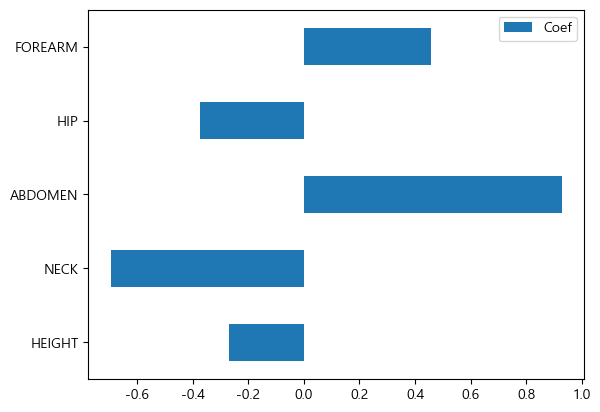

In [37]:
# 63 Page
# 설명변수 중요도
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:]},  
                           index = ['HEIGHT','NECK','ABDOMEN','HIP','FOREARM'])
df_reg_coef.plot.barh(y = "Coef")